<h1><center>Introduction to Pandas and NumPy</center></h1>

This is short tutorial on getting started with pandas and numpy. These two libraries are extensively (and may be exclusively) used for handling any mathematical operations with data. Pandas and NumPy both help in parallelizing the code. While parallelization has some overhead cost (in terms of time) but for codes with lot of data (lot of rows in your excel/csv/SQl dataframe), parallelization if the way to go for efficient (fast) codes.

<h2>Help in python or R</h2>

Stack overflow is the best resource for seeking help on any coding language. Given python and R are used extensively, stack overflow is very rich in resources with exact solution to almost all queries. It is even an OK answer to tell in interviews that you use stack overflow. 

Use stack overflow as some people dont just provide the code, they also provide information on why the code works (and sometimes logic as why you may be doing something wrong if you are looking for a particular type of code). 

<h2>Python libraries</h2>

A lot of libraries have already been created in python so we dont have to code everything from scratch. We can just use existing libraries in code by importing those libraries. Two libraries we discuss today are numpy and pandas. You will be using a lot of libraries in MSBA such as:
<ul>
    <li>matplotlib : for drawing figures (e.g. for descriptive analysis)</li>
    <li>sklearn : for building machine learning models</li>
    <li>statsmodel : for building statistical models (e.g. time series, poisson regression)</li>
    <li>random : introducing randomness in your simulation models</li>
    <li>maths : for performing mathematical operations (e.g. math.pow(3,2) gives 3 to the power of 2 = 9)</li>
</ul>

We can use the documentation of the library as a guide to understand what are the parameters of the model. For example, in the linear regression library documentation, we can see what are the parameters (what are the default values the library model considers) and how these parameters can be changed to improve the model.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">linear regression in sklearn</a>: the parameters are  fit_intercept=True, normalize=False, copy_X=True, n_jobs=None. Values after "=" are the default value set for each of these parameters. The description below shows what these values are and what is the default value set for each of them. Similarly, 

<a href="https://xgboost.readthedocs.io/en/latest/python/python_api.html">xgboost library</a>: the parameters are:data, label=None, weight=None, base_margin=None, missing=None, silent=False, feature_names=None, feature_types=None, nthread=None, enable_categorical=False

<h3>importing libraries</h3>

In [1]:
# importing some of the libraries below
import pandas as pd 
import matplotlib.pyplot as mplt
import numpy as np
from IPython.core.display import display, HTML

# pandas as pd (or numpy as np) is creating a alias for pandas. 
# so that when we code, we need to write np.sum() instead of numpy.sum(), similarly pd.read_csv instead of pandas.read_csv

# when we import a library, we dont need to import the complete library. We can just import part of it.
# here, we just import pyplot function inside the matplotlib library (and name it as mplt).

# we do not import the complete library to keep our code light and fast (so that it consumes less memory)
# speed of a code depends on the amount of data/information in the working memory of the computer (RAM). 
# if you load more and more data (or huge data) in computer memory, your code will be slow. 
# therefore it is good practice to delete the data from the code memory which will not be used in the code later(using del a)

<h2>Introduction to Pandas</h2>

Pandas is a software library written for the Python programming language for data manipulation and analysis. It is like the SQL where data manipulation across columns can be done in parallel. Its super fast and efficient.

<b>RULE</b> If you have data set with millions of rows, and if you are coding a loop (over all the millions of rows), your coding most definitely wont work. You need to perform some sort of column-wise operations.

Here are some of the links to get started with pandas:
<ul>
    <li> <a href="https://pandas.pydata.org/docs/user_guide/10min.html">getting started with pandas</a></li>
    <li> <a href="https://pandas.pydata.org/docs/user_guide/cookbook.html#cookbook">pandas cookbook</a></li>
    <li> <a href="https://github.com/jvns/pandas-cookbook">github repository for pandas cookbook</a></li>
    <li> <a href="https://www.learnpython.org/en/Pandas_Basics">interactive tutorial on pandas</a></li>
</ul>

<b>NOTE</b> All the operations that can be performed using pandas in python can be performed using R dataFrame in R programming language as well (only slight changes in syntax)

If the data is in the following format, pandas can be used to analyze the data as first step of data analytics. The data in tabular form consists of rows (index 0) and columns (index 1). Pandas maintain an index for each rows. One columns of the pandas dataframe if called <b>Series</b>. Note that some operations on dataframe cannot be performed on Series (example, merge).

<img src="pandas-data-structure.svg" width="500">

Some exercises on pandas (and source of image above) is <a href="https://www.w3resource.com/python-exercises/pandas/index.php">here</a>.

<h3>loading data</h3>

In [2]:
# reading the data in pandas dataframe format
data = pd.read_csv('churn.csv')
print('shape (rows and columns)',data.shape)

# .head() function shows the top 5 rows of the data
print(data.head(3))
# .tail(n) gives last n rows of the data
# print(data.tail(3))

shape (rows and columns) (7043, 21)
   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              0                1               0  ...   
1             1              0                1               1  ...   
2             1              0                1               1  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         1   
1                 1            0            0                0         2   
2                 0            0            0                0         1   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges Churn  
0                 1 

In [3]:
# first check the data type of each of the columns
data.dtypes

customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

<h3>checking empty rows/column</h3>

In [4]:
# missing data is a big topic in itself:
# do we replace missing data with average of the column or just remove that row? here we check for missing data and remove row

# following code find the rows with missing data
np.where(pd.isnull(data))

# check if there is any missing data here: False says no missing data
#data.isnull().values.any()

(array([], dtype=int64), array([], dtype=int64))

In [5]:
# getting a value from cell
# iloc is a pandas keyword which tells the location from where the data is to be collected from
data['MonthlyCharges'].iloc[10], data.iloc[10,18]

(49.95, 49.95)

In [6]:
# creating a new column based on some operations
# TotalCharges can be obtained by multiplying tenure and monthlyCharges (all operations performed in parallel by pandas)
data['newTotalCharges'] = data['MonthlyCharges']*data['tenure']

<h3>working with functions</h3>

In [7]:
# function in pandas
# the following function works on each element (parallelized)


# in this function we convert the float into integers
def convert2int(x):
    return(int(x))

# apply and lambda are key words
data['newTotalCharges'] = data['newTotalCharges'].apply(lambda x:convert2int(x))

#  we can remove some columns
del data['TotalCharges']

In [8]:
# printing the columns of the dataframe
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'Churn', 'newTotalCharges'],
      dtype='object')

<h3>Some SQL operations</h3>

In [10]:
# all SQL functions can be performed in pandas. Some of them include:
# sort by some column
# uncomment to see the results
data = data.sort_values(by=['MonthlyCharges'])
#print(data.head())

# group by
data_groupby = data.groupby(['tenure']).mean()
print(data_groupby.head())

# 

          gender  SeniorCitizen   Partner  Dependents  PhoneService  \
tenure                                                                
0       0.545455       0.000000  0.818182    1.000000      0.818182   
1       0.536705       0.140294  0.159869    0.169657      0.905383   
2       0.453782       0.180672  0.201681    0.117647      0.915966   
3       0.495000       0.125000  0.235000    0.160000      0.860000   
4       0.500000       0.147727  0.272727    0.227273      0.892045   

        MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
tenure                                                                 
0            0.363636         0.454545        0.363636      0.363636   
1            0.132137         1.112561        0.060359      0.076672   
2            0.184874         1.260504        0.113445      0.159664   
3            0.240000         1.255000        0.100000      0.175000   
4            0.318182         1.221591        0.136364      0.181818  

<b>Some exploratory analysis</b><br>
Data in pandas dataframe format can be sent to plotting function. Plotting function understands the data format and plot accordingly. 

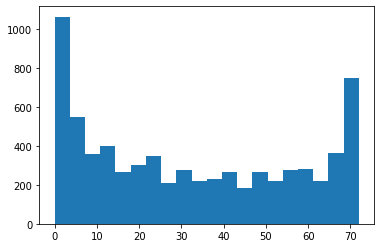

In [11]:
mplt.hist(data['tenure'],bins=20);

In [12]:
# this gives a frequency of how many times a particular value was observed in that column (e.g. column tenure)
print(data['tenure'].value_counts)

<bound method IndexOpsMixin.value_counts of 3719    28
1529    59
6652    36
6906    25
1156    53
        ..
5127    67
3894    68
4804    61
2115    71
4586    72
Name: tenure, Length: 7043, dtype: int64>


<h3>Pandas and SQL</h3>

<b>Pandas</b> provide an endless opportunity to perform data processing. Please see the resources above to learn how to code those functionalities. Some of them include:
<ul>
    <li>merging two data sets using a primary key (a unique common key in both database)</li>
    <li>sum/mean/min/max for a user/specific primary key</li>
    <li>plotting using columns of the pandas dataFrame</li>
    <li>sorting/arranging based on some factors (uniquely for a primary key)</li>
</ul>

Its easy to look for code on stack overflow. All these operations are performed fast and efficiently by pandas library automatically (we dont have to worry about parallelization in pandas as it is done automatically).

<h2>Introduction to NumPy</h2>

Pandas library is actually built using numpy. NumPy (Numerical Python) deals with parallelization of data. Any data as shown below in the figure (in any dimension) can be stored in a numpy format. Numpy format converts the data into a matrix form (it could be multi-dimensional). If data is stored in a numpy format, python automatically understands that it is in a matrix form and performs all the operation in parallel.

<b>PARALLELIZATION</b> If you have a quad core computer, it means your computer has 4 processors. When we write a loop (for example finding the sum of all rows in a column), only one of the core is used. But if we use numpy (for example np.sum(a)), the numpy library uses all the four cores of the computer. This is called parallelization and it makes the code run faster (you really want that when you will be working with millions of rows of data). 

<b>RULE</b> If you large dataset and if there is ANY opportunity to parallelize the data by converting it into matrix form, use the matrix form of the data for that operation.  



<img src="matrix.png" width="500">

<center>Different dimensional data</center>

In [13]:
# storing data in a nupy array
data_np = data.values
print(".shape functions tells the shape of the data:",data_np.shape)

.shape functions tells the shape of the data: (7043, 21)


In [14]:
# python understands that the first in pandas is the name of the columns

# data also contains a string column with strings, we remove it here and can keep a list of the ids
customer_id = data_np[:,0]

# following code deletes the first column of the data (which we have already stored above)
data_np = np.delete(data_np,0,1)

<h3>creating numpy arrays</h3>

In [15]:
# creating 3d or 4d array (initializing it with 0)
a = np.zeros((2,3,4))  # array with size2(0th dimension), 3 (1st dimension), and 4 (2nd dimension)
print(a.shape)

b = a[0]               #size of b should be (3,4) as that is the dimension of the a[0] or a[1])
print(b.shape,a[1].shape)

(2, 3, 4)
(3, 4) (3, 4)


<h3>numpy axes</h3>

All the operations in numpy can be performed by understanding the axes as how the data is stored. np.sum(a) would return the sum across all the dimensions. But if we want to get the sum across just one dimension, we can write np.sum(a,axis=0): it gives the sum of all the rest of the elements of a across 0th dimension. np.sum(a,axis=0) should give the shape of (3,4) as all elements are summed across the 0th dimension. Similarly, sum across other dimensions can be checked as well (shown below).

In [16]:
np.sum(a,axis=0).shape,np.sum(a,axis=1).shape,np.sum(a,axis=2).shape

((3, 4), (2, 4), (2, 3))

In [17]:
# now that we have stored data in the numpy format in data_np, we can performa all the numpy operations

# sum
sum_rows = np.sum(data_np,axis=0) # find the sum across all the rows (rows is the 0th dimension)
sum_cols = np.sum(data_np,axis=1) # find the sum across all the columns (rows is the 1st dimension)

sum_rows.shape,sum_cols.shape

((20,), (7043,))

<h3>resources for numpy</h3>

Use this list as an introduction to numpy (there is stack overflow for more options with numpy).
<ul>
    <li><a href = "https://numpy.org/devdocs/user/quickstart.html">introduction to numpy</a></li>
    <li><a href = "https://cs231n.github.io/python-numpy-tutorial/">stanford tutorial on python</a></li>
    <li><a href = "https://numpy.org/doc/stable/user/numpy-for-matlab-users.html">numpy and matlab similarity (if you are coming from matlab)</a></li>
</ul>

<h3>matrix operations</h3>

In [18]:
# numpy is great with matrix operations
# (3,4) is the shape of the numpy array
a = np.random.uniform(0,5,(3,4))
b = np.random.uniform(10,15,(4,3))
c = np.random.uniform(10,15,(3,4))

In [19]:
# matrix multiplication (rows and columns should be appropriate)
d = np.matmul(a,b)   #matmul stands for matrix multiplication
#print(d.shape)

# element wise multiplication (both should have same size)
d = np.multiply(a,c)
#print(d.shape)

# using multiple operations in the same line of code
d = np.matmul(np.multiply(a,c),b)   # first multiply a and c and then multiply it by b
#print(d.shape)

# transpose
#print(a,'\n',a.T)

d = np.matmul(b.T,a.T)   # because we used transpose, we need to change the order of a and b
#print(d.shape)

<h3>working with index</h3>

numpy can be used to perform search operations in a array (again, fast and efficiently). Some of the examples using the index is shown bleow:

In [20]:
# first part is condition, second part says what to do if condition is satisfied, third part is what to do in else condition
ind_a = np.where(a<2,0,100)
#print(ind_a)

# gives a index where a is less than 2 (in terms of true and false)
ind_a = a<2
#print(ind_a)

# following gives the index of all the elements with a < 2
ind = np.argwhere(a<2)
#print(ind)

# gives max of the value in a
ind = np.max(a)
#print(ind)

# gives index of the maximum value (8 becasue 4.28 is the eighth index)
ind = np.argmax(a)
#print(ind)

# gives the exact location of maximum value of a
ind = np.argwhere(a==np.max(a))
#print(ind)

In [21]:
a

array([[2.66360839, 1.46380366, 3.90163223, 1.27236268],
       [1.30359908, 4.67636243, 4.86286645, 2.29255247],
       [1.40352759, 0.20457158, 3.09284023, 0.60080095]])